In [1]:
# importing packages and other items used
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display_html, HTML, Image
%matplotlib inline
conn = sqlite3.connect('MLB_Data.db')

In [2]:
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [3]:
# allows tables to be printed side by side.. i.e. comparing between LHP/RHP
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table', 
            'table style="display:inline"'),raw=True)

In [4]:
# created tables to use for graphing Avg runs against LHP/RHP
conn = sqlite3.connect("MLB_Data.db")
cur = conn.cursor()
#---------------------------------------------------------------------#
cur.execute('''DROP TABLE IF EXISTS [RHP_RvsAB]''')
cur.execute('''DROP TABLE IF EXISTS [LHP_RvsAB]''')
cur.execute('''CREATE TABLE RHP_RvsAB(teams, ab, r)''')
cur.execute('''CREATE TABLE LHP_RvsAB(teams, ab, r)''')
cur.execute("INSERT INTO RHP_RvsAB VALUES ('30', '123020', '17004')")
cur.execute("INSERT INTO LHP_RvsAB VALUES ('30', '42547', '5578')")


conn.commit()
conn.close()

In [5]:
# setting league averages for each option
leagueAVGRHP = 0.254867
leagueRunAvgRHP = 1.854
leagueAVGLHP = 0.255
leagueRunAvgLHP = 1.956

In [6]:
# set func with total runs scored against each Pitcher
conn = sqlite3.connect("MLB_Data.db")
cur = conn.cursor()

sql_averageLHP = "SELECT * FROM MLB_vs_LHP_2017"
averageLHP = pd.read_sql_query(sql_averageLHP, conn)
#----------------------------------------------------#
sql_averageRHP = "SELECT * FROM MLB_vs_RHP_2017"
averageRHP = pd.read_sql_query(sql_averageRHP, conn)
#----------------------------------------------------#
RHPruns = sum(averageRHP['R'])
RHPab = sum(averageRHP['AB'])
RHPavg = RHPab/RHPruns
LHPruns = sum(averageLHP['R'])
LHPab = sum(averageLHP['AB'])
LHPavg = LHPab/LHPruns

# Code Louisville 2018 - Python Project
## Is a Left-Handed Pitcher better than a Right-Handed Pitcher
#### Created By Devin Francis

<table><tr><td><img src='img/LHP.jpeg'></td><td><img src='img/RHP.jpeg'></td></tr></table>
## Is a Left-Handed Pitcher better than a Right-Handed Pitcher?
The rumor is that a Left-Handed Pitcher is better than a Right-Handed Pitcher. This stems from the theory that when a pitcher and batter share the same dominant hand (i.e. Right-Handed Pitcher vs Right-Handed Batter), that the Pitcher gets the advantage.  Since there are less left-handed batters in the MLB, the theory is born.  I have decided to take data from the 2017 season and put that theory to the test. 

The first that I did was gather all the data from 2017 in regards to stats against Left-Handed Pitchers.  Here is the stats for each team against LHP.  I have displayed the Top 5 and Bottom 5 teams.

In [7]:
display_side_by_side(averageLHP.head(), averageLHP.tail())

,RK,TEAM,GP,AB,R,H,2B,3B,HR,TB,RBI,AVG,OBP,SLG,OPS
0,1,CLE,140,1926,280,520,106,7,71,853,267,0.270,0.351,0.443,0.794
1,2,COL,129,1554,241,436,89,10,62,731,232,0.281,0.344,0.470,0.814
2,3,LAD,133,1571,227,398,97,6,65,702,222,0.253,0.342,0.447,0.789
3,4,MIN,132,1602,224,416,87,8,47,660,218,0.260,0.332,0.412,0.744
4,5,HOU,117,1426,212,396,80,6,59,665,200,0.278,0.348,0.466,0.814
,RK,TEAM,GP,AB,R,H,2B,3B,HR,TB,RBI,AVG,OBP,SLG,OPS
25,26,OAK,130,1355,161,319,71,4,44,530,152,0.235,0.313,0.391,0.704
26,27,STL,116,1179,160,298,56,8,50,520,153,0.253,0.336,0.441,0.777
27,28,SD,117,1444,150,327,60,6,52,555,146,0.226,0.294,0.384,0.679
28,29,LAA,118,1375,149,317,54,5,30,471,139,0.231,0.306,0.343,0.649


I did the same thing for the data against RHP.  

In [8]:
display_side_by_side(averageRHP.head(), averageRHP.tail())

,RK,TEAM,GP,AB,R,H,2B,3B,HR,TB,RBI,AVG,OBP,SLG,OPS
0,1,HOU,162,4185,684,1185,266,14,179,2016,654,0.283,0.345,0.482,0.827
1,2,NYY,162,4146,660,1093,202,16,185,1882,634,0.264,0.341,0.454,0.795
2,3,WAS,162,4326,650,1139,241,23,170,1936,631,0.263,0.332,0.448,0.780
3,4,CHI,161,4115,622,1038,218,20,172,1812,594,0.252,0.334,0.440,0.774
4,5,BOS,162,4435,617,1132,231,15,137,1804,577,0.255,0.323,0.407,0.729
,RK,TEAM,GP,AB,R,H,2B,3B,HR,TB,RBI,AVG,OBP,SLG,OPS
25,26,CWS,160,4056,506,1004,185,24,141,1660,478,0.248,0.307,0.409,0.716
26,27,PHI,158,3972,506,1018,210,24,126,1654,480,0.256,0.319,0.416,0.736
27,28,PIT,159,4168,502,1016,195,27,112,1601,474,0.244,0.318,0.384,0.702
28,29,SF,160,3893,460,964,203,24,95,1500,437,0.248,0.307,0.385,0.693


The next step is to condense the data down for the first part.  To see the difference in batting averages against each opposing pitcher.  The table on the left is against LHP, and the table on the right is against RHP.

In [9]:
# sets up table displaying a teams AVG to RUNS ratio
teamsRunsvsAVGLHP = averageLHP[['TEAM', 'AVG','H', 'R']]
teamsRunsvsAVGRHP = averageRHP[['TEAM', 'AVG', 'H', 'R']]
#---------------------------------------------------------#
display_side_by_side(teamsRunsvsAVGLHP.describe(), teamsRunsvsAVGRHP.describe())

,AVG,H,R
count,30.000000,30.000000,30.000000
mean,0.255000,361.600000,185.933333
std,0.015559,46.749221,28.979105
min,0.226000,298.000000,143.000000
25%,0.244000,327.500000,168.250000
50%,0.253000,359.000000,179.500000
75%,0.266250,386.500000,199.500000
max,0.281000,520.000000,280.000000
,AVG,H,R
count,30.000000,30.000000,30.000000


As we can see, the average batting average against each opposing pitcher isn't too far off. There is a difference of 0.001.

Digging deeper into the theory, the below chart shows each teams batting average in comparison to the League's average against LHP.  

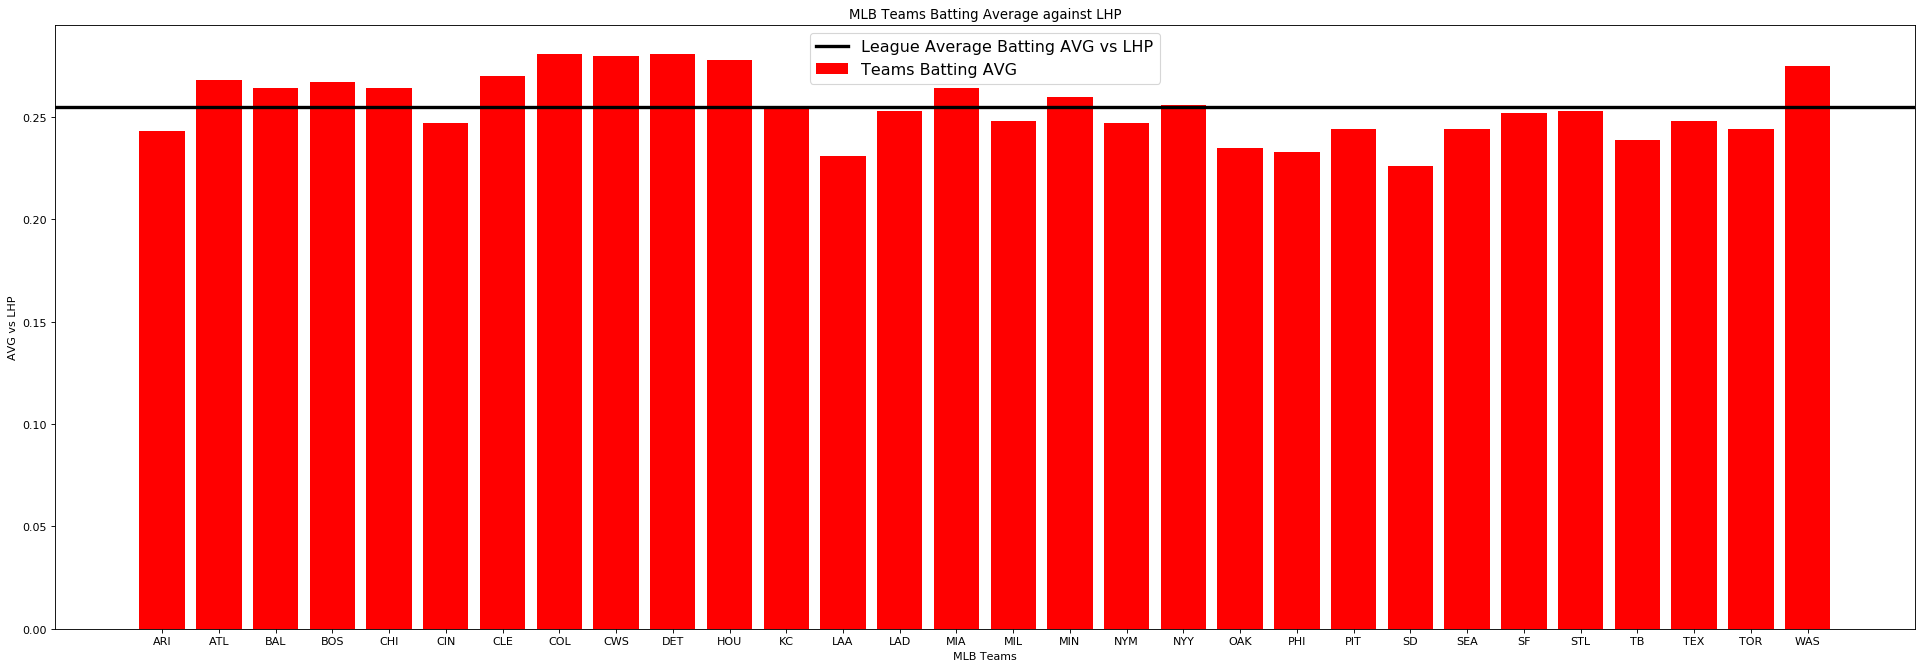

In [31]:
# creates BAR GRAPH for averages against LHP  
conn = sqlite3.connect("MLB_Data.db")
cur = conn.cursor()
#---------------------------------------------------------------#
sql_teamsAVGvsLHP = "SELECT TEAM, AVG, OBP, SLG FROM MLB_vs_LHP_2017"
teamsAVGvsLHP = pd.read_sql_query(sql_teamsAVGvsLHP, conn)
#---------------------------------------------------------------#
plt.figure(figsize=(30,10), dpi=80)
plt.title('MLB Teams Batting Average against LHP')
plt.xlabel('MLB Teams')
plt.ylabel('AVG vs LHP')
plt.axhline(leagueAVGLHP, color='k', lw='3', ls='-',
           label='League Average Batting AVG vs LHP')
plt.bar(teamsAVGvsLHP['TEAM'], teamsAVGvsLHP['AVG'], color='r', label='Teams Batting AVG')
plt.legend(fontsize='x-large');

Of the 30 teams in the MLB, only 13 teams hit above the leage average against LHP.  But, it looks like at least 11 of those teams hit *well* over the average.

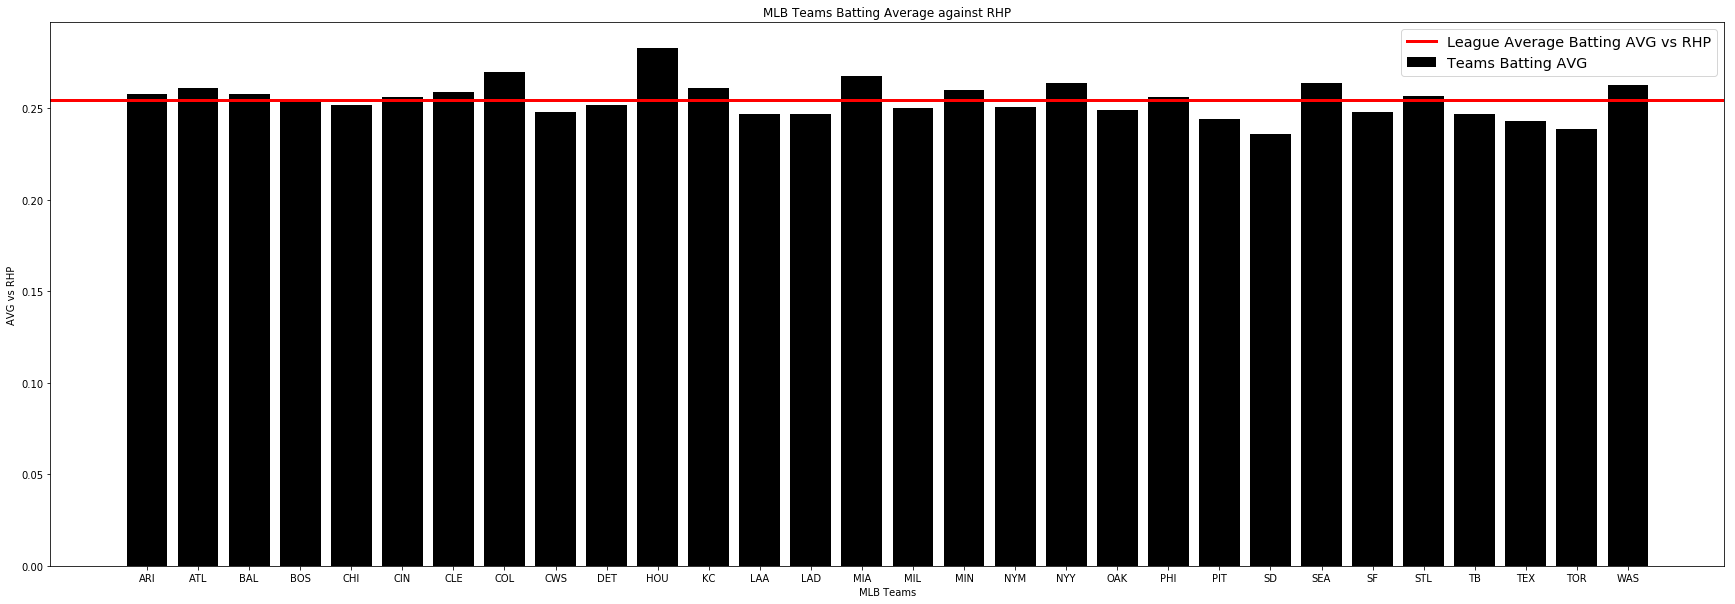

In [19]:
# creates BAR GRAPH for averages against RHP
conn = sqlite3.connect("MLB_Data.db")
cur = conn.cursor()
#---------------------------------------------------------------------#
sql_teamsAVGvsRHP = "SELECT TEAM, AVG, OBP, SLG FROM MLB_vs_RHP_2017"
teamsAVGvsRHP = pd.read_sql_query(sql_teamsAVGvsRHP, conn)
#---------------------------------------------------------------------#
plt.figure(figsize=(30, 10))
plt.title('MLB Teams Batting Average against RHP')
plt.xlabel('MLB Teams')
plt.ylabel('AVG vs RHP')
plt.axhline(leagueAVGRHP, color='r', lw='3', ls='-',
           label='League Average Batting AVG vs RHP')
plt.bar(teamsAVGvsRHP['TEAM'], teamsAVGvsRHP['AVG'], color='k', label='Teams Batting AVG')
plt.legend(fontsize='x-large');

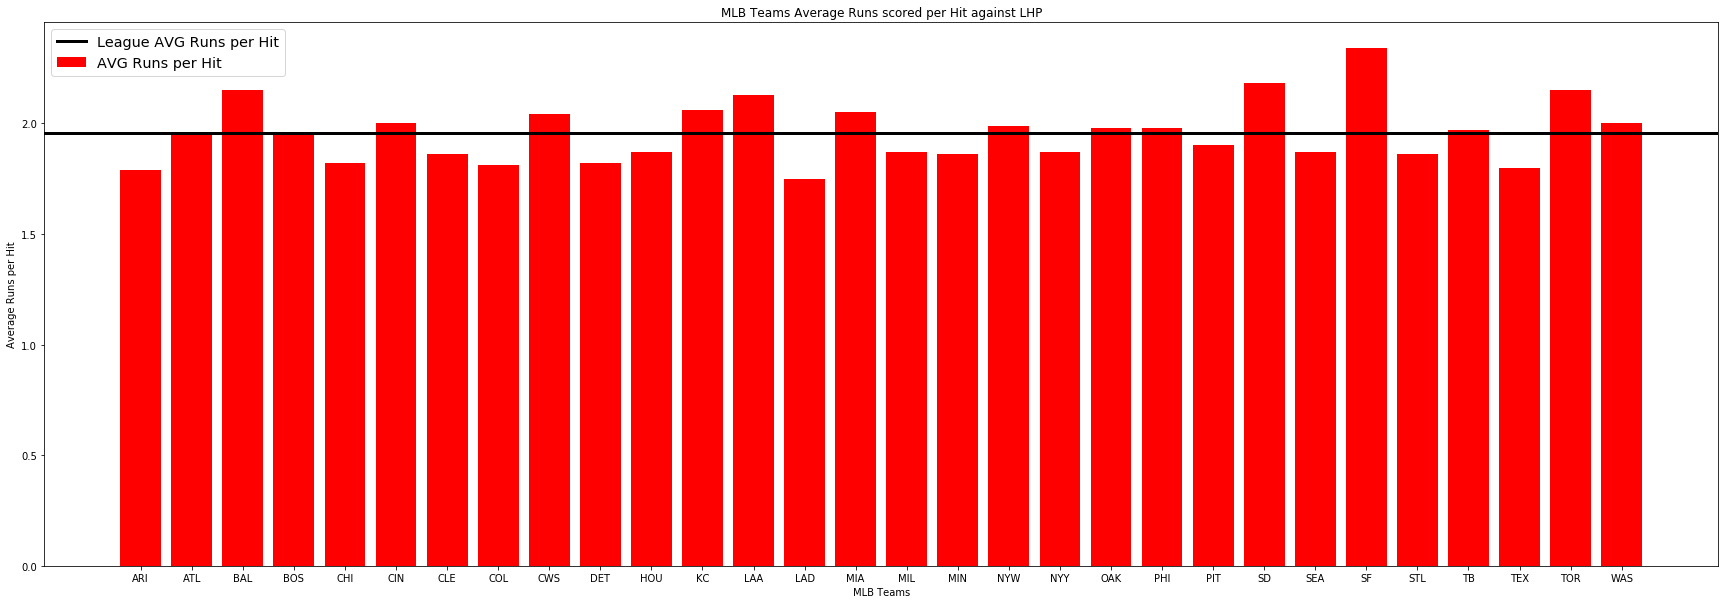

In [20]:
# bar graph comparing teams average runs per hit against the leagues average against LHP
conn =sqlite3.connect("MLB_Data.db")
cur = conn.cursor()
#-----------------------------------------------#
sql_MLBvsLHP = "SELECT * FROM MLBvsLHP"
MLBvsLHP = pd.read_sql_query(sql_MLBvsLHP, conn)
#-----------------------------------------------#
plt.figure(figsize=(30, 10))
plt.title('MLB Teams Average Runs scored per Hit against LHP')
plt.xlabel('MLB Teams')
plt.ylabel('Average Runs per Hit')
plt.axhline(leagueRunAvgLHP, color='k', lw='3', ls='-', label='League AVG Runs per Hit')
plt.bar(MLBvsLHP['TEAM'], MLBvsLHP['RunRatio'], color='r', label='AVG Runs per Hit')
plt.legend(fontsize='x-large', loc='upper left');

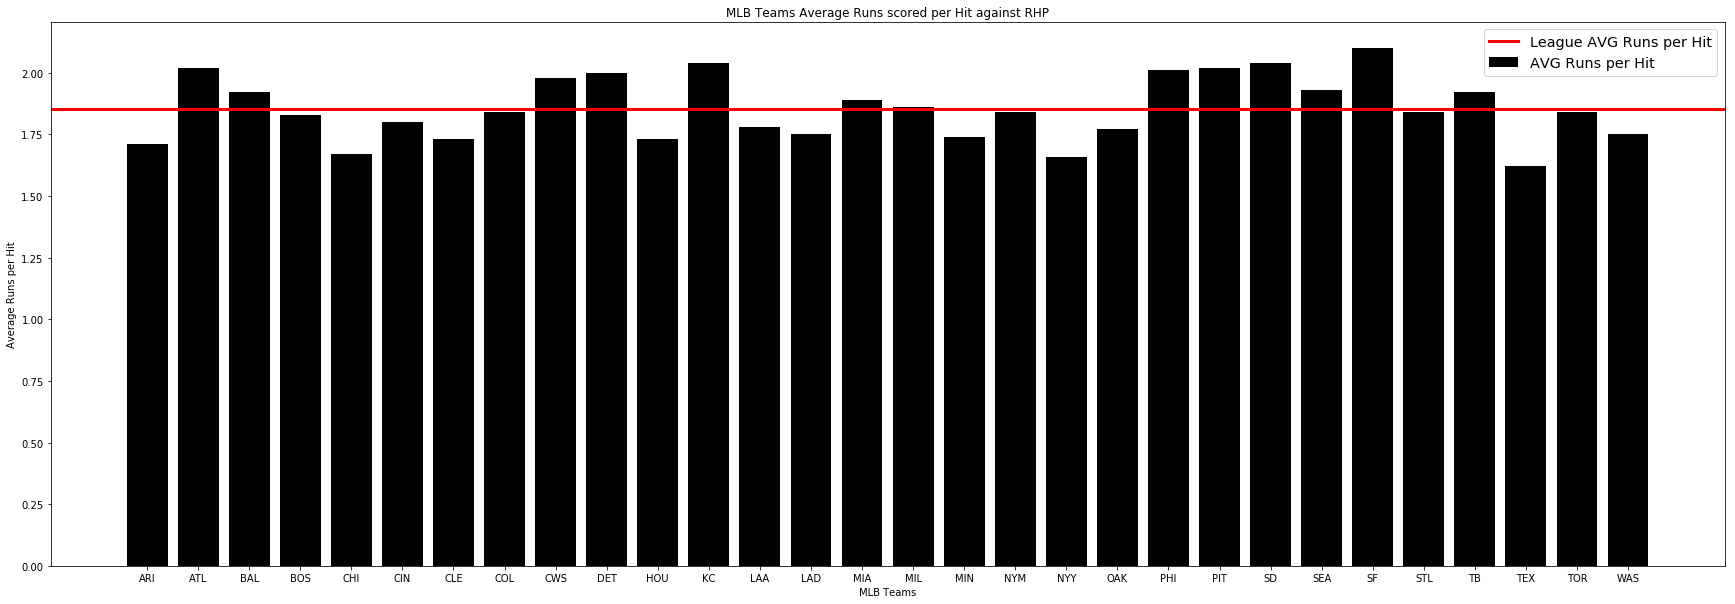

In [21]:
# bar graph comparing teams average runs per hit against the leagues average against RHP
conn = sqlite3.connect("MLB_Data.db")
cur = conn.cursor()
#-----------------------------------------------#
sql_MLBvsRHP = "SELECT * FROM MLBvsRHP"
MLBvsRHP = pd.read_sql_query(sql_MLBvsRHP, conn)
#-----------------------------------------------#
plt.figure(figsize=(30, 10))
plt.title('MLB Teams Average Runs scored per Hit against RHP')
plt.xlabel('MLB Teams')
plt.ylabel('Average Runs per Hit')
plt.axhline(leagueRunAvgRHP, color='r', lw='3', ls='-', label='League AVG Runs per Hit')
plt.bar(MLBvsRHP['TEAM'], MLBvsRHP['RunRatio'], color='k', label='AVG Runs per Hit')
plt.legend(fontsize='x-large');

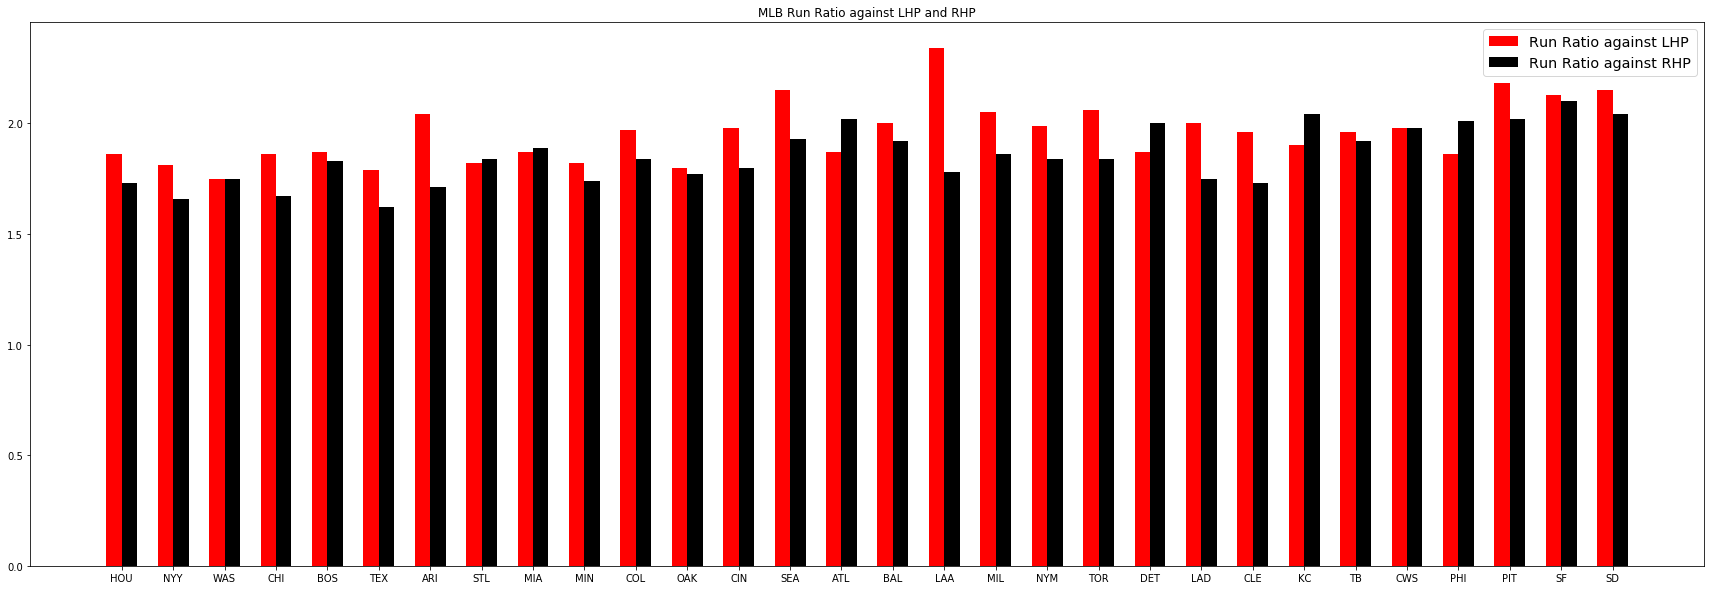

In [22]:
conn = sqlite3.connect("MLB_Data.db")
cur = conn.cursor()
#-------------------------------------#
plt.figure(figsize=(30, 10))
ax = plt.subplot()
N = 30
w = 0.3

ind = np.arange(N)

LHP = ax.bar(ind, MLBvsLHP['RunRatio'], w, color='r', label="Run Ratio against LHP")
RHP = ax.bar(ind + w, MLBvsRHP['RunRatio'], w, color='k', label="Run Ratio against RHP")

ax.set_xticks(ind + w / 2)
ax.set_xticklabels(MLBvsRHP['TEAM'])
plt.title('MLB Run Ratio against LHP and RHP')
plt.legend(fontsize='x-large')
plt.show();

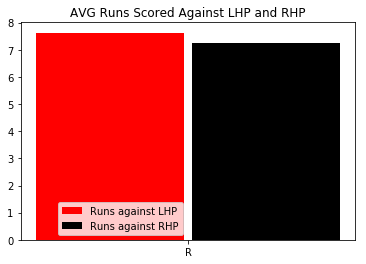

In [23]:
conn = sqlite3.connect("MLB_Data.db")
cur = conn.cursor()
#-------------------------------------------------------------#
sqlAvgLHP = """SELECT AB/(1.0*R) AS 'AB/R' FROM LHP_RvsAB"""
avgLHP = pd.read_sql_query(sqlAvgLHP, conn)
#-------------------------------------------------------------#
sqlAvgRHP = """SELECT AB/(1.0*R) AS 'AB/R' FROM RHP_RvsAB"""
avgRHP = pd.read_sql_query(sqlAvgRHP, conn)
#-------------------------------------------------------------#
ax = plt.subplot()
N = 1
w = .3

ind = np.arange(N)

LHP = ax.bar(ind, avgLHP['AB/R'], w, color='r', label='Runs against LHP')
RHP = ax.bar(ind + w*1.05, avgRHP['AB/R'], w, color='k', label='Runs against RHP')
ax.set_xticks(ind + w / 1.90)
ax.set_xticklabels(('R'))
ax.legend(loc=4, bbox_to_anchor=(0.5, 0))

plt.title('AVG Runs Scored Against LHP and RHP')
plt.show();